In [1]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
    #  Secondly, read csv file
data =pd.read_csv('/data_zeft/weatherHistory.csv')

data.isnull().sum()
data['Precip Type'].unique()

data['Precip Type'] = data['Precip Type'].fillna("None")
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [3]:
data.dropna(axis = 0 , inplace=True)

    #  List first 5 records
data.head(5)
data.isnull().sum()

    #  List the types of the columns
data.drop(columns = 'Loud Cover',inplace=True)
data.dtypes

    #  Descriptive statistics for the numeric columns
data.describe()

    #  Represent the dimensionality
data.shape

    #  Number of elements
data.size # 96453 rows x 12 columns

    #  Find the number of repeated rows
data.duplicated().sum()

24

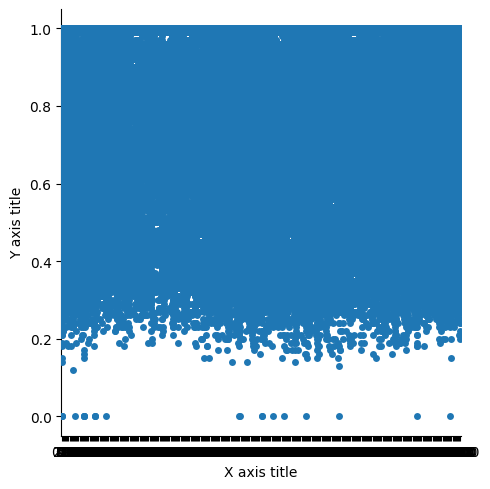

In [6]:
#Creating bar plot or any plot type we need
# sns.barplot(x = 'Wind Bearing (degrees)',y = 'Humidity' ,data=data)
sns.catplot(x='Wind Bearing (degrees)', y='Humidity', data=data)
#Adding the aesthetics
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 

# Show the plot
plt.show()

In [ ]:
     #  List the data
x= data.iloc[:,3:9]
y=data['Apparent Temperature (C)'].tolist()# Change the array to a list of same items
print(x)
print(y)

In [ ]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
print(len(y_transformed))

# Select 24000 rows for testing dataset
x_test = x.iloc[0:24000,:].values.astype('float32') # Change selected items data type
y_test=y_transformed[0:24000]
x_train = x.iloc[24001::, :].values.astype('float32') # Change selected items data type
y_train=y_transformed[24001::]
# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()
# y_train = lab.fit_transform(y)

# #view transformed values
# print(y_train)

# Normalizing the features for test and train
print((min(x_train[2]), max(x_train[2])))

# Data normalization
x_train=x_train/255.0
x_test=x_test/255.0

# Print the dataset train and test shape
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

In [ ]:
#  Applying SVM algorithm
SVM_model=svm.SVC(C=5.0,kernel='rbf')

# Train the algorithm
SVM_model.fit(x_train,y_train,)



In [ ]:
# Make prediction by test data
y_pred=SVM_model.predict(x_test)

    # Get model accuracy
accuracy_score(y_pred,y_test)

In [ ]:
 
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)
  
# Calculate the accuracy of the model
print(knn.score(x_test, y_test))

In [ ]:
# splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
from sklearn import metrics
    # Generate the numbers for "actual" and "predicted" values.
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)
    # We use the confusion matrix function on our actual and predicted values.
confusion_matrix = metrics.confusion_matrix(actual, predicted)
    # Convert the table into a confusion matrix display.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    # Finally we display the plot
cm_display.plot()
plt.show()
